In [1]:
import sys
sys.path.append('/app')
sys.path.append('/app/loopa')

In [2]:
from memlish.image_processing.text_drawer import DefaultTextDrawer
from memlish.io.image import load_image

from pathlib import Path

## Check drawer functionality

In [20]:
sample_template = Path('Doge.jpg')
assert sample_template.exists()

In [21]:
drawer = DefaultTextDrawer()

In [22]:
drown_text = drawer.add_text(str(sample_template), 'Good boy!')

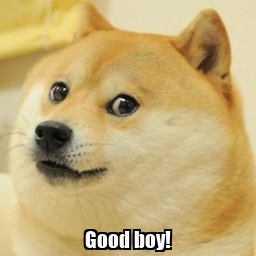

In [23]:
drown_text

## Test searh flow with drawer

In [10]:
from loopa.executors.clip import CLIPTextEncoder
from loopa.executors.index import FaissIndexer, IndexMerger
from memlish.config import IMAGE_DIR, JINA_EMBS_COLLECTION_NAME
from memlish.executors.text_drawer import TextDrawer

from jina import Document, DocumentArray, Flow, Executor, requests
from jina.types.request import Request

import matplotlib.pyplot as plt
import torch

In [13]:
torch.multiprocessing.set_start_method('spawn', force=True)

In [14]:
def input_docs(images):
    for img_path in images:
        doc = Document(id=str(img_path.name), uri=str(img_path), tags={'filename': str(img_path)})
        yield doc

def plot_search_results(resp: Request):
    for doc in resp.docs:
        print(f'Query text: {doc.text}')
        print(f'Matches:')
        print('-'*10)
        show_docs(doc.matches)
        
def show_docs(docs):
    for doc in docs:
        doc.load_uri_to_image_blob()
        plt.imshow(doc.blob)
        plt.show()

In [16]:
EMBEDDER_PARAMS = {
    "batch_size": 64,
    "device": 'cuda'
}

faiss_indexer_params = {
        "reference_img_dir": str(IMAGE_DIR),
        "collection_name": JINA_EMBS_COLLECTION_NAME
    }

drawer_params = {
    "out_path": './drown'
}

In [24]:
flow_search = Flow().add(uses=CLIPTextEncoder, name=f"CLIPTextEncoder", uses_with=EMBEDDER_PARAMS, needs='gateway', replicas=2)\
                        .add(uses=FaissIndexer, name=f"FaissIndexer", workspace="workspace", uses_with=faiss_indexer_params)\
                        .add(uses=TextDrawer, name=f"TextDrawer", uses_with=drawer_params, replicas=2)\
                        .needs_all(uses=IndexMerger, name="merger")

flow_search

⠙ 1/5 waiting CLIPTextEncoder FaissIndexer TextDrawer merger to be ready...       

Downloading: 100%|██████████| 842k/842k [00:00<00:00, 5.10MB/s]


⠦ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading: 100%|██████████| 512k/512k [00:00<00:00, 2.82MB/s]


⠸ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading: 100%|██████████| 389/389 [00:00<00:00, 277kB/s]


⠦ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading: 100%|██████████| 568/568 [00:00<00:00, 496kB/s]


⠋ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading: 100%|██████████| 1.42M/1.42M [00:00<00:00, 7.62MB/s]


⠧ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading: 100%|██████████| 4.03k/4.03k [00:00<00:00, 3.26MB/s]
ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


⠼ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading:   1%|▏         | 7.69M/577M [00:00<00:14, 42.0MB/s]

⠧ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading:   4%|▍         | 22.0M/577M [00:00<00:12, 48.4MB/s]

⠋ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading:   6%|▋         | 36.5M/577M [00:00<00:11, 50.1MB/s]

⠸ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading:   8%|▊         | 46.1M/577M [00:01<00:11, 50.0MB/s]

⠴ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading:  10%|▉         | 55.6M/577M [00:01<00:11, 49.4MB/s]

⠧ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading:  12%|█▏        | 69.8M/577M [00:01<00:10, 49.6MB/s]

⠋ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading:  14%|█▎        | 79.3M/577M [00:01<00:10, 49.7MB/s]

⠹ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading:  16%|█▌        | 93.5M/577M [00:02<00:10, 49.3MB/s]

⠴ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading:  19%|█▊        | 108M/577M [00:02<00:09, 50.0MB/s] 

⠇ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading:  20%|██        | 117M/577M [00:02<00:09, 49.8MB/s]

⠋ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading:  23%|██▎       | 132M/577M [00:02<00:09, 49.7MB/s]

⠸ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading:  24%|██▍       | 141M/577M [00:03<00:09, 49.1MB/s]

⠴ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading:  26%|██▌       | 151M/577M [00:03<00:09, 48.9MB/s]

⠧ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading:  29%|██▊       | 165M/577M [00:03<00:08, 49.1MB/s]

⠏ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading:  30%|███       | 174M/577M [00:03<00:08, 48.9MB/s]

⠹ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading:  32%|███▏      | 184M/577M [00:03<00:08, 47.1MB/s]

⠼ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading:  33%|███▎      | 192M/577M [00:04<00:08, 46.3MB/s]

⠦ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading:  36%|███▌      | 206M/577M [00:04<00:08, 47.8MB/s]

⠇ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading:  38%|███▊      | 221M/577M [00:04<00:07, 49.5MB/s]

⠙ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading:  40%|███▉      | 230M/577M [00:04<00:07, 48.1MB/s]

⠼ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading:  42%|████▏     | 244M/577M [00:05<00:07, 48.5MB/s]

⠦ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading:  44%|████▍     | 254M/577M [00:05<00:06, 48.8MB/s]

⠏ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading:  46%|████▋     | 268M/577M [00:05<00:06, 47.1MB/s]

⠙ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         Index intitialized successfully!
⠹ 3/5 waiting CLIPTextEncoder FaissIndexer to be ready...                         

Downloading:  48%|████▊     | 277M/577M [00:05<00:06, 47.9MB/s]

⠼ 4/5 waiting CLIPTextEncoder to be ready...                                      

Downloading:  50%|█████     | 291M/577M [00:06<00:06, 48.8MB/s]

⠧ 4/5 waiting CLIPTextEncoder to be ready...                                      

Downloading:  53%|█████▎    | 305M/577M [00:06<00:05, 50.1MB/s]

⠏ 4/5 waiting CLIPTextEncoder to be ready...                                      

Downloading:  55%|█████▍    | 315M/577M [00:06<00:05, 50.3MB/s]

⠙ 4/5 waiting CLIPTextEncoder to be ready...                                      

Downloading:  57%|█████▋    | 330M/577M [00:07<00:05, 50.8MB/s]

⠼ 4/5 waiting CLIPTextEncoder to be ready...                                      

Downloading:  60%|█████▉    | 344M/577M [00:07<00:04, 51.0MB/s]

⠧ 4/5 waiting CLIPTextEncoder to be ready...                                      

Downloading:  61%|██████▏   | 354M/577M [00:07<00:04, 50.8MB/s]

⠏ 4/5 waiting CLIPTextEncoder to be ready...                                      

Downloading:  63%|██████▎   | 364M/577M [00:07<00:04, 50.1MB/s]

⠙ 4/5 waiting CLIPTextEncoder to be ready...                                      

Downloading:  65%|██████▌   | 378M/577M [00:08<00:04, 49.1MB/s]

⠼ 4/5 waiting CLIPTextEncoder to be ready...                                      

Downloading:  67%|██████▋   | 387M/577M [00:08<00:04, 49.0MB/s]

⠦ 4/5 waiting CLIPTextEncoder to be ready...                                      

Downloading:  70%|██████▉   | 402M/577M [00:08<00:03, 49.4MB/s]

⠏ 4/5 waiting CLIPTextEncoder to be ready...                                      

Downloading:  72%|███████▏  | 416M/577M [00:08<00:03, 49.9MB/s]

⠹ 4/5 waiting CLIPTextEncoder to be ready...                                      

Downloading:  74%|███████▎  | 426M/577M [00:09<00:03, 50.2MB/s]

⠼ 4/5 waiting CLIPTextEncoder to be ready...                                      

Downloading:  75%|███████▌  | 435M/577M [00:09<00:02, 50.0MB/s]

⠦ 4/5 waiting CLIPTextEncoder to be ready...                                      

Downloading:  77%|███████▋  | 445M/577M [00:09<00:02, 47.1MB/s]

⠇ 4/5 waiting CLIPTextEncoder to be ready...                                      

Downloading:  79%|███████▉  | 459M/577M [00:09<00:02, 48.7MB/s]

⠙ 4/5 waiting CLIPTextEncoder to be ready...                                      

Downloading:  82%|████████▏ | 473M/577M [00:10<00:02, 49.9MB/s]

⠼ 4/5 waiting CLIPTextEncoder to be ready...                                      

Downloading:  85%|████████▍ | 488M/577M [00:10<00:01, 50.6MB/s]

⠧ 4/5 waiting CLIPTextEncoder to be ready...                                      

Downloading:  86%|████████▌ | 498M/577M [00:10<00:01, 49.9MB/s]

⠏ 4/5 waiting CLIPTextEncoder to be ready...                                      

Downloading:  88%|████████▊ | 507M/577M [00:10<00:01, 49.5MB/s]

⠙ 4/5 waiting CLIPTextEncoder to be ready...                                      

Downloading:  90%|████████▉ | 517M/577M [00:11<00:01, 50.4MB/s]

⠸ 4/5 waiting CLIPTextEncoder to be ready...                                      

Downloading:  92%|█████████▏| 531M/577M [00:11<00:00, 50.2MB/s]

⠦ 4/5 waiting CLIPTextEncoder to be ready...                                      

Downloading:  95%|█████████▍| 546M/577M [00:11<00:00, 50.2MB/s]

⠏ 4/5 waiting CLIPTextEncoder to be ready...                                      

Downloading:  97%|█████████▋| 560M/577M [00:11<00:00, 50.3MB/s]

⠹ 4/5 waiting CLIPTextEncoder to be ready...                                      

Downloading: 100%|█████████▉| 575M/577M [00:12<00:00, 49.8MB/s]

⠴ 4/5 waiting CLIPTextEncoder to be ready...                                      

Downloading: 100%|██████████| 577M/577M [00:12<00:00, 49.1MB/s]


           Flow@33[I]:🎉 Flow is ready to use!                                             
	🔗 Protocol: 		GRPC
	🏠 Local access:	0.0.0.0:57095
	🔒 Private network:	172.20.0.6:57095
	🌐 Public address:	35.224.116.253:57095
⠏ Working... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 0:00:00 estimating... end - start 0.29644060134887695
doc.uri /data/reddit/images/images/vamby0o8btb71.jpg
⠋ Working... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 0:00:01 estimating... doc.uri /data/reddit/images/images/a7i0s30zupe61.jpg
⠙ Working... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 0:00:01 estimating... doc.uri /data/reddit/images/images/2p9tfujakpy71.jpg
doc.uri /data/reddit/images/images/p3ak0ewlr7j71.jpg
⠸ Working... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 0:00:01 estimating... Query text: Index showcase is here!
Matches:
----------
⠴ Working... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 0:00:01 estimating... 

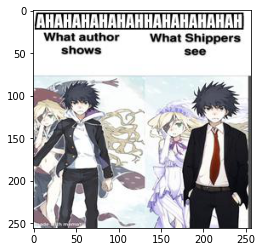

Query text: Bart
Matches:
----------
⠦ Working... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 0:00:01 estimating... 

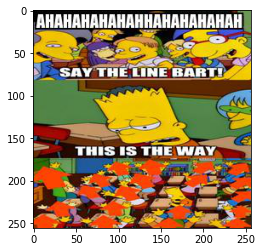

Query text: That beautiful day
Matches:
----------
⠇ Working... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 0:00:01 estimating... 

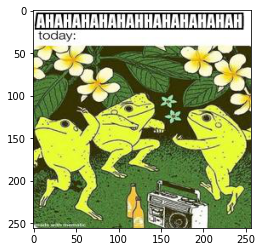

Query text: What happened?
Matches:
----------
⠋ Working... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 0:00:02 estimating... 

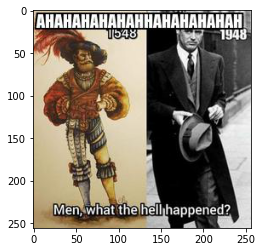

⠙       DONE ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 0:00:02 100% ETA: 0 seconds 80 steps done in 2 seconds


In [18]:
with flow_search:
    resp = flow_search.post(on='/search',inputs=DocumentArray([
                    Document(text='Index showcase is here!'),
                    Document(text='Bart'),
                    Document(text='That beautiful day'),
                    Document(text='What happened?'),
                ]), parameters={"top_k": 1}, on_done=plot_search_results, show_progress=True, return_results=False)